In [1]:
labels_p = ['quarterback', 'running_back', 'wide_reciever', 'o_line', 'tight_end']

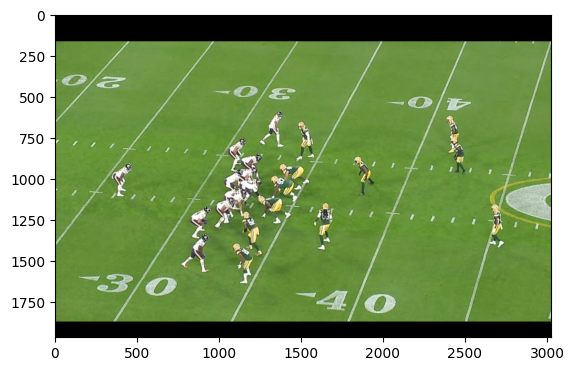

In [4]:
import matplotlib.pyplot as plt
import os
import cv2
IMAGE_PATH = os.path.join('sideline_v2', 'Tensorflow', 'workspace', 'images', 'test', 'wide_reciever.0028cdac-2188-11ee-b314-5a28ce701c8a.jpg')
plt.imshow(cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
import tensorflow as tf
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

/Users/henrykraessig/Desktop/tfod/odvenv/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/henrykraessig/Desktop/tfod/odvenv/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/Users/henrykraessig/Desktop/tfod/odvenv/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/Users/henrykraessig/Desktop/tfod/odvenv/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/Users/henrykraessig/Desktop/tfod/odvenv/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ["dlopen(/Users/henrykraess

In [6]:
# Load pipeline config and build a detection model
configs_f = config_util.get_configs_from_pipeline_file(os.path.join('field_v1', 'Tensorflow', 'workspace', 'models', 'my_ssd_mobnet', 'pipeline.config'))
detection_model_f = model_builder.build(model_config=configs_f['model'], is_training=False)

# Restore checkpoint
ckpt_f = tf.compat.v2.train.Checkpoint(model=detection_model_f)
ckpt_f.restore(os.path.join('field_v1', 'Tensorflow', 'workspace','models','my_ssd_mobnet', 'ckpt-11')).expect_partial()

@tf.function
def detect_fn_f(image):
    image, shapes = detection_model_f.preprocess(image)
    prediction_dict = detection_model_f.predict(image, shapes)
    detections = detection_model_f.postprocess(prediction_dict, shapes)
    return detections


In [7]:
# Load pipeline config and build a detection model
configs_p = config_util.get_configs_from_pipeline_file(os.path.join('sideline_v2', 'Tensorflow', 'workspace', 'models', 'my_ssd_mobnet', 'pipeline.config'))
detection_model_p = model_builder.build(model_config=configs_p['model'], is_training=False)

# Restore checkpoint
ckpt_p = tf.compat.v2.train.Checkpoint(model=detection_model_p)
ckpt_p.restore(os.path.join('sideline_v2', 'Tensorflow', 'workspace','models','my_ssd_mobnet', 'ckpt-13')).expect_partial()

@tf.function
def detect_fn_p(image):
    image, shapes = detection_model_p.preprocess(image)
    prediction_dict = detection_model_p.predict(image, shapes)
    detections = detection_model_p.postprocess(prediction_dict, shapes)
    return detections

In [8]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

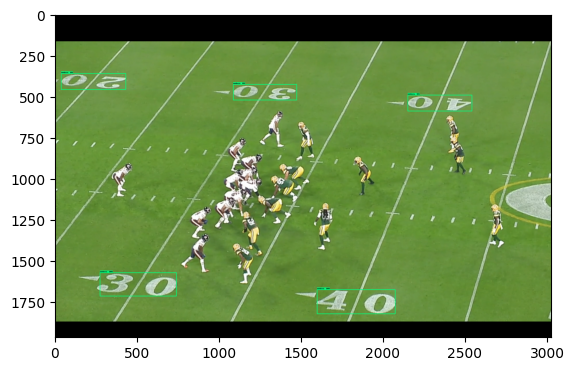

In [9]:
category_index_f = label_map_util.create_category_index_from_labelmap(os.path.join('field_v1', 'Tensorflow', 'workspace','annotations', 'label_map.pbtxt'))

img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections_f = detect_fn_f(input_tensor)

num_detections = int(detections_f.pop('num_detections'))
detections_f = {key: value[0, :num_detections].numpy()
              for key, value in detections_f.items()}
detections_f['num_detections'] = num_detections

# detection_classes should be ints.
detections_f['detection_classes'] = detections_f['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections_f['detection_boxes'],
            detections_f['detection_classes']+label_id_offset,
            detections_f['detection_scores'],
            category_index_f,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()


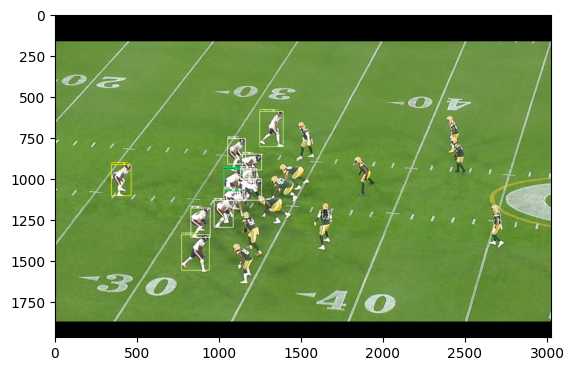

In [10]:
category_index_p = label_map_util.create_category_index_from_labelmap(os.path.join('sideline_v2', 'Tensorflow', 'workspace','annotations', 'label_map.pbtxt'))


img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections_p = detect_fn_p(input_tensor)

num_detections = int(detections_p.pop('num_detections'))
detections_p = {key: value[0, :num_detections].numpy()
              for key, value in detections_p.items()}
detections_p['num_detections'] = num_detections

# detection_classes should be ints.
detections_p['detection_classes'] = detections_p['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections_p['detection_boxes'],
            detections_p['detection_classes']+label_id_offset,
            detections_p['detection_scores'],
            category_index_p,
            use_normalized_coordinates=True,
            max_boxes_to_draw=11,
            min_score_thresh=.3,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()


In [11]:
def drawline(slope, point, color):
    intercept = point[1] - slope * point[0]
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color=color)
    return slope, intercept
    

In [12]:
def get_intersection(line1, line2):
    x_val = (line2[1] - line1[1]) / (line1[0] - line2[0])
    y_val = line1[0] * x_val + line1[1]
    return x_val, y_val

In [13]:
def get_distance(p1, p2):
    if p1[1] < p2[1]:
        return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** .5
    else:
        return -1 * ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** .5

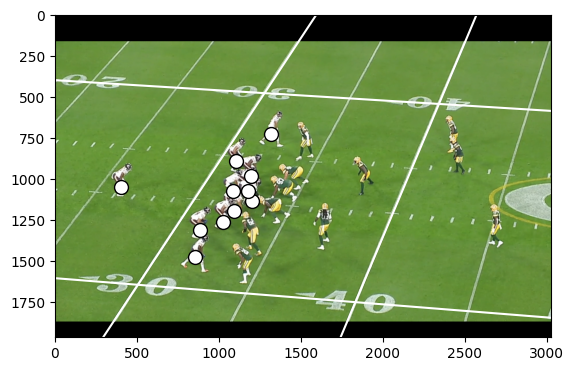

In [14]:
from sklearn.linear_model import LinearRegression

c = 0
for score in detections_f['detection_scores']:
    if score >= .8:
        c += 1
    else:
        break

height = image_np.shape[0]
width = image_np.shape[1]

top_x = []
top_y = []
bottom_x = []
bottom_y = []

for e in detections_f['detection_boxes'][:c]:
    array = e * np.array([height, width, height, width])
    midpoint_y = (array[0] + array[2]) / 2
    midpoint_x = (array[1] + array[3]) / 2
    if midpoint_y <= (height / 2):
        top_x.append(midpoint_x)
        top_y.append(midpoint_y)
    else:
        bottom_x.append(midpoint_x)
        bottom_y.append(midpoint_y)


# arrays for top and bottom x and y
top_x = np.array(top_x)
top_y = np.array(top_y)
bottom_x = np.array(bottom_x)
bottom_y = np.array(bottom_y)
# fitting linear models
top_model = LinearRegression().fit(top_x.reshape((-1, 1)), top_y)
bottom_model = LinearRegression().fit(bottom_x.reshape((-1, 1)), bottom_y)

plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
# along the field lines
drawline(top_model.coef_, (0, top_model.intercept_), 'white')
drawline(bottom_model.coef_, (0, bottom_model.intercept_), 'white')


top = list(zip(top_x, top_y))
bottom = list(zip(bottom_x, bottom_y))

bottom.sort()
top.sort()

horiz_lines = []

# pairing numbers with horizontal counterpart
if bottom_model.coef_ >= 0:
    for coords in bottom:
        for t in top:
            if (t[0] - top_model.coef_ * 300) < coords[0]:
                pass
            else:
                horiz_lines.append((coords, t))
                break
else:
    top = top[::-1]
    for coords in bottom:
        for t in top:
            if (t[0] + top_model.coef_* 300) > coords[0]:
                pass
            else:
                horiz_lines.append((coords, t))
                break

lines = []
# drawing horizontal lines
for coords in horiz_lines:
    slope = (coords[1][1] - coords[0][1]) / (coords[1][0] - coords[0][0])
    point = coords[0]
    lines.append(drawline(slope, point, 'white'))

        







c = 0
for score in detections_p['detection_scores']:
    if score >= .3:
        c += 1
    else:
        break


if c > 11:
    c = 11
player_positions = []
c = 11
for e in detections_p['detection_boxes'][:c]:
    normalized = e * np.array([height, width, height, width])
    midpoint_x = (normalized[1] + normalized[3]) / 2
    midpoint_y = (normalized[0] + normalized[2]) / 2
    player_positions.append((midpoint_x, normalized[0] + 130))



for px, py in player_positions:
    plt.plot(px, py, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="white")






plt.ylim(image_np.shape[0], 0)
plt.xlim(0, image_np.shape[1])
plt.show()

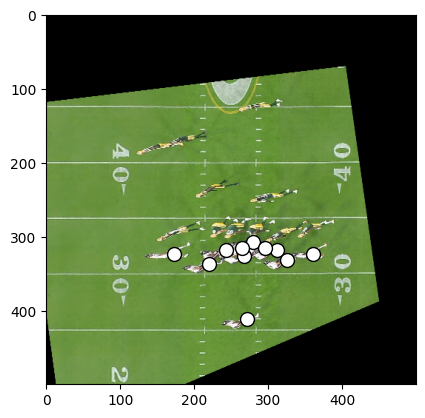

In [15]:
corners = []

for group in horiz_lines:
    for tup in group:
        if len(corners) >= 4:
            break
        else:
            corners.append(tup)


newcorners = np.array([[400, 350],
                       [100, 350],
                       [400, 200],
                       [100, 200]])



matrix = cv2.getPerspectiveTransform(np.float32(corners), np.float32(newcorners))
result = cv2.warpPerspective(image_np, matrix, (500, 500))

for px, py in player_positions:
    pos = np.array([[[px,py]]], dtype = "float32")
    warped_position = cv2.perspectiveTransform(pos, matrix)[0][0]
    plt.plot(warped_position[0], warped_position[1], marker="o", markersize=10, markeredgecolor="black", markerfacecolor="white")
    

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

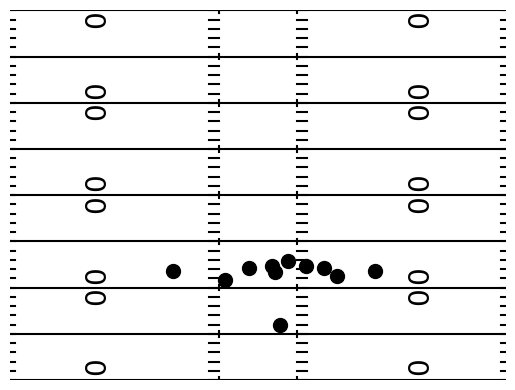

In [16]:
ax = plt.gca()
for n in range(0, 2250, 250):
    plt.plot([0, 1000], [n, n], color='black')
    plt.plot([422, 422], [n-15, n+15], color='black')
    plt.plot([578, 578], [n-15, n+15], color='black')

for n in range(0, 2050, 50):
    plt.plot([402, 422], [n, n], color='black')
    plt.plot([578, 598], [n, n], color='black')
    plt.plot([0, 10], [n, n], color='black')
    plt.plot([990, 1000], [n, n], color='black')

s = '0'

plt.text(148, 60, s, rotation='vertical', size=20)
plt.text(799, 60, s, rotation='vertical', size=20)
plt.text(148, 1940, s, rotation='vertical', size=20)
plt.text(799, 1940, s, rotation='vertical', size=20)


for n in range(500, 2000, 500):
    plt.text(148, n+55, s, rotation='vertical', size=20)
    plt.text(148, n-60, s, rotation='vertical', size=20)
    plt.text(799, n+55, s, rotation='vertical', size=20)
    plt.text(799, n-60, s, rotation='vertical', size=20)

# plt.plot([172, 172], [0, 2000])
# plt.plot([823, 823], [0, 2000])


newcorners = np.array([[823, 500],
                       [172, 500],
                       [823, 1000],
                       [172, 1000]])

matrix = cv2.getPerspectiveTransform(np.float32(corners), np.float32(newcorners))
#result = cv2.warpPerspective(image_np, matrix, (500, 500))

for px, py in player_positions:
    pos = np.array([[[px,py]]], dtype = "float32")
    warped_position = cv2.perspectiveTransform(pos, matrix)[0][0]
    plt.plot(warped_position[0], warped_position[1], marker="o", markersize=10, markeredgecolor="black", markerfacecolor="black")



plt.xlim([0, 1000])
plt.ylim([0, 2000])
plt.axis('off')
plt.show()